In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline 

In [2]:
data = pd.read_csv("data\diabetes.csv") 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


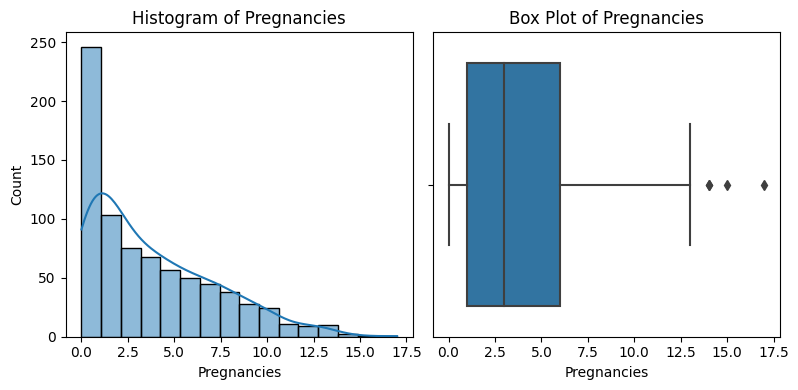

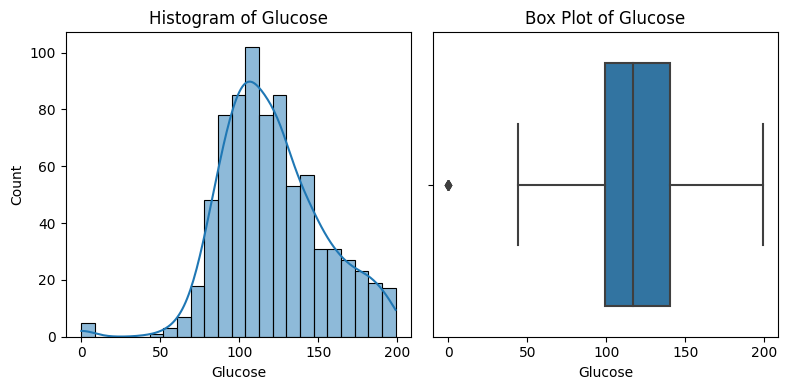

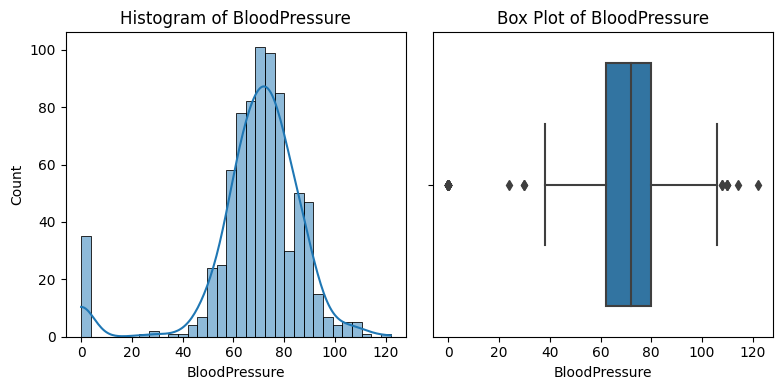

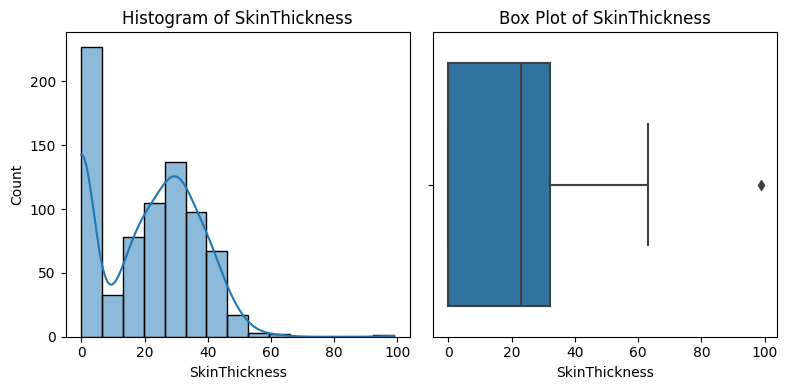

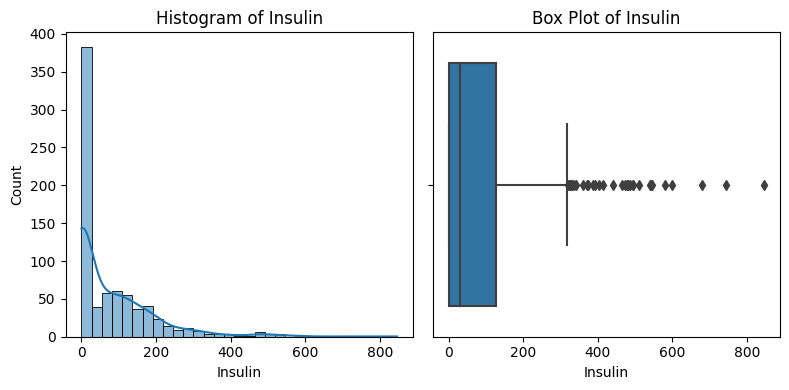

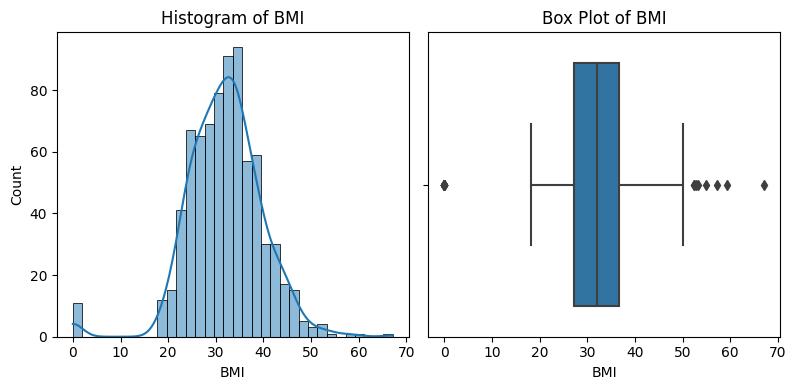

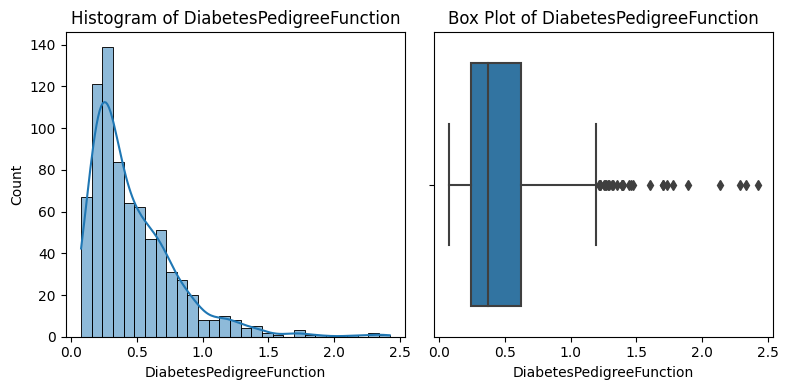

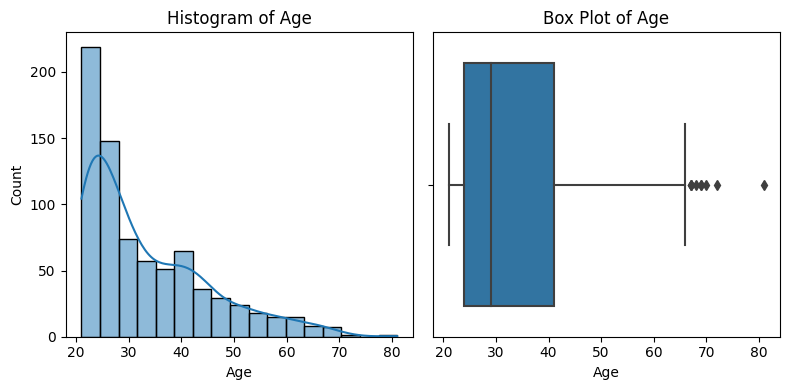

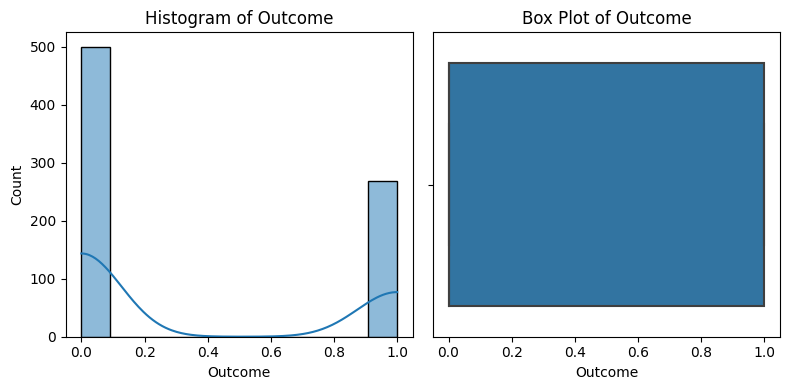

In [5]:
# Histograms and Box Plots for numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    
    plt.tight_layout()
    plt.show()

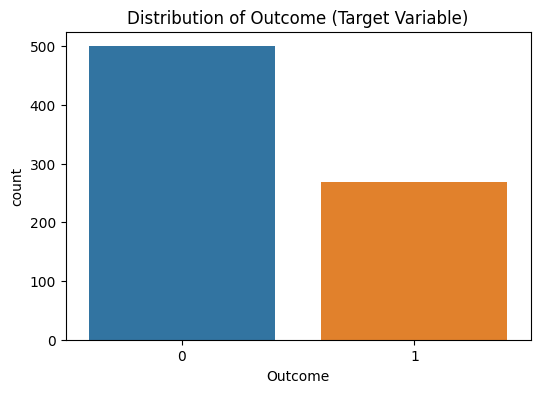

In [6]:
# Distribution of the target variable 'Outcome'
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Outcome')
plt.title('Distribution of Outcome (Target Variable)')
plt.show()

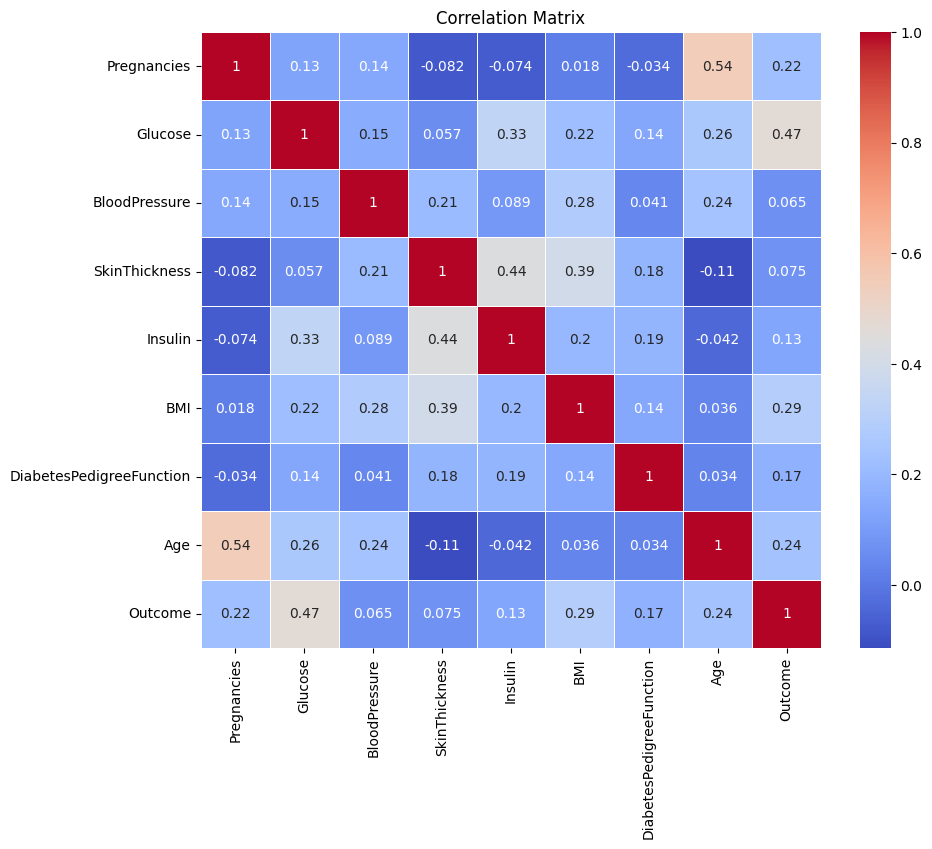

In [7]:
# Calculate and visualize the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



In [8]:
# Highlight correlations with the target variable 'Outcome'
corr_with_target = corr_matrix['Outcome'].sort_values(ascending=False)
print(corr_with_target)


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


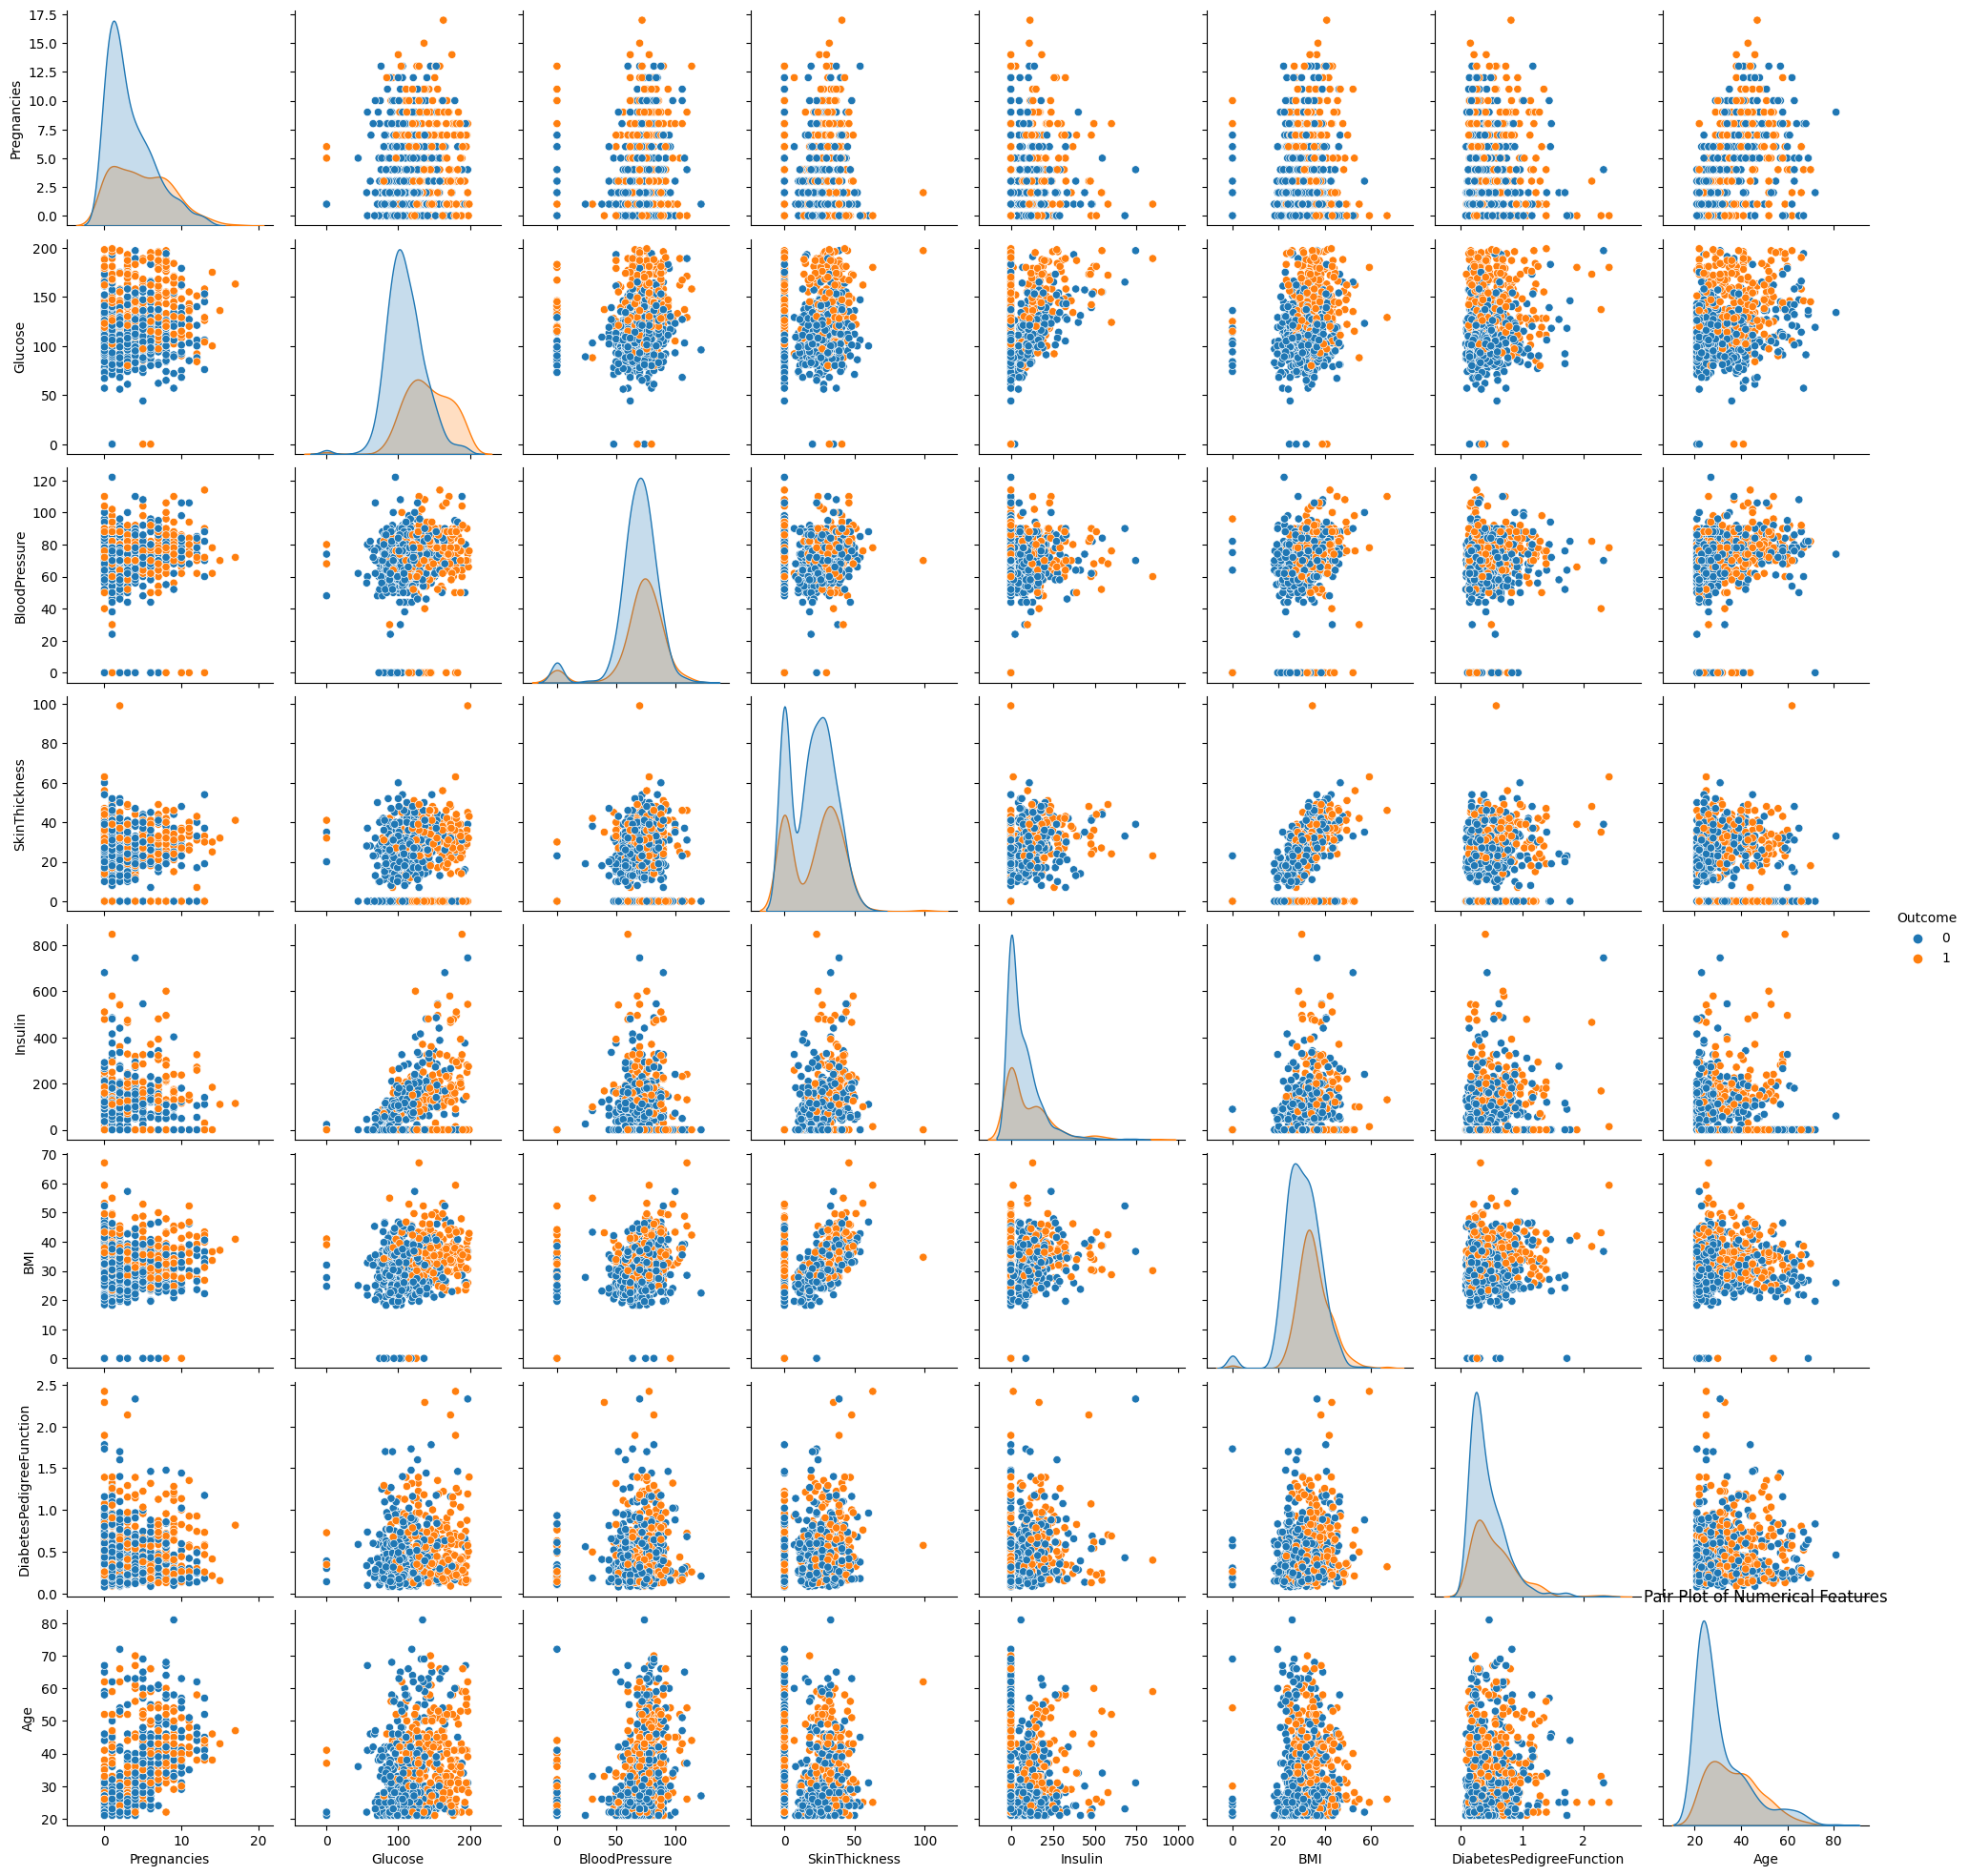

In [9]:
# 6. Feature Relationships:

# Pair plots to visualize relationships between numerical features
sns.pairplot(data=data, hue='Outcome', diag_kind='kde')
plt.title('Pair Plot of Numerical Features')
plt.show()

In [14]:
import numpy as np
from scipy import stats

# Define a threshold for the Z-score (e.g., 3.0 for extreme outliers)
threshold = 3.0

# Calculate the Z-scores for each numeric column
z_scores = np.abs(stats.zscore(data.select_dtypes(include=['number'])))

# Create a DataFrame to store the Z-scores
z_score_df = pd.DataFrame(z_scores, columns=data.select_dtypes(include=['number']).columns)

# Find and print the rows with outliers for each numeric feature
outlier_indices = np.where(z_scores > threshold)
outlier_rows = set(outlier_indices[0])  # Get unique row indices with outliers

# Print the rows with outliers
for row_index in outlier_rows:
    print(f"Outlier detected in row {row_index}:\n")
    print(data.iloc[row_index])
    print("\n")

# You can also choose to remove or handle outliers as needed
# df_no_outliers = df.drop(index=list(outlier_rows))


Outlier detected in row 4:

Pregnancies                   0.000
Glucose                     137.000
BloodPressure                40.000
SkinThickness                35.000
Insulin                     168.000
BMI                          43.100
DiabetesPedigreeFunction      2.288
Age                          33.000
Outcome                       1.000
Name: 4, dtype: float64


Outlier detected in row 7:

Pregnancies                  10.000
Glucose                     115.000
BloodPressure                 0.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          35.300
DiabetesPedigreeFunction      0.134
Age                          29.000
Outcome                       0.000
Name: 7, dtype: float64


Outlier detected in row 8:

Pregnancies                   2.000
Glucose                     197.000
BloodPressure                70.000
SkinThickness                45.000
Insulin                     543.000
BMI                          30.500


In [13]:
# Calculate the IQR for each numeric column
Q1 = data.select_dtypes(include=['number']).quantile(0.25)
Q3 = data.select_dtypes(include=['number']).quantile(0.75)
IQR = Q3 - Q1

# Define a multiplier to determine the threshold for outliers (e.g., 1.5 for mild outliers)
threshold_multiplier = 1.5

# Calculate the lower and upper bounds for each numeric column
lower_bound = Q1 - threshold_multiplier * IQR
upper_bound = Q3 + threshold_multiplier * IQR

# Find and print the rows with outliers for each numeric feature
for col in data.select_dtypes(include=['number']).columns:
    outlier_indices = np.where((data[col] < lower_bound[col]) | (data[col] > upper_bound[col]))
    if len(outlier_indices[0]) > 0:
        print(f"Outliers detected in column '{col}':\n")
        for row_index in outlier_indices[0]:
            print(data.iloc[row_index])
            print("\n")




Outliers detected in column 'Pregnancies':

Pregnancies                  15.000
Glucose                     136.000
BloodPressure                70.000
SkinThickness                32.000
Insulin                     110.000
BMI                          37.100
DiabetesPedigreeFunction      0.153
Age                          43.000
Outcome                       1.000
Name: 88, dtype: float64


Pregnancies                  17.000
Glucose                     163.000
BloodPressure                72.000
SkinThickness                41.000
Insulin                     114.000
BMI                          40.900
DiabetesPedigreeFunction      0.817
Age                          47.000
Outcome                       1.000
Name: 159, dtype: float64


Pregnancies                  14.000
Glucose                     100.000
BloodPressure                78.000
SkinThickness                25.000
Insulin                     184.000
BMI                          36.600
DiabetesPedigreeFunction      0.412
A